<span style="color:#195879">

## 🚀😎 Minimum Viable Data Enthusiast
</span>

<span style="font-size:14.0pt">
<strong>Author:</strong></span> <span style="font-size:13.0pt">Manfredo E. Aceituno</span><br>
<span style="font-size:14.0pt"><strong>Date:</strong></span> <span style="font-size:13.0pt">November, 2024</span><br>
<span style="font-size:14.0pt"><strong>Programming language:</strong></span> <span style="font-size:13.0pt">Python</span>

<span></span>  
<span style="font-size:12.0pt">Nothing is perfect, so please [contact me](http://www.linkedin.com/in/manfredo-aceituno-perez) for any feedback or suggestions for improvement.</span> 

<span style="font-size:13.0pt">
<span style="color:#93bd25">

## **Colombia's population density** 
</span>
</span>

#### **`Geopandas - Basic data analysis`**

<a id="table_content"></a>
## Table of Contents

1. [Dataframes preparation Overview](#Intro)
2. [Map density visualization](#map_graph)
3. [Insights](#conclusion)

<a id="Intro"> <a/>
## 1. Analysis overview

[Return to: Table of contents](#table_content)

In [1]:
import geopandas as gpd

In [2]:
grilla = gpd.read_file(r"C:\Users\_PopulationDensity\Grilla_id.geojson")

<Axes: >

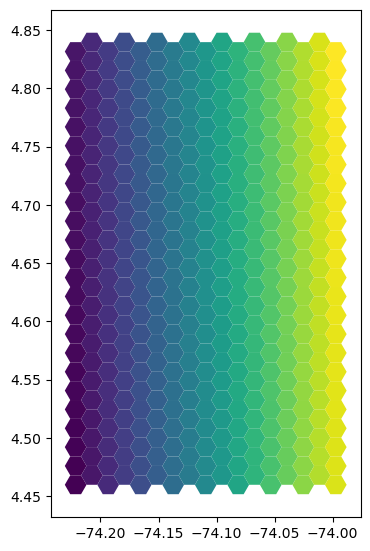

In [3]:
# Visualizing the dataframe grilla
grilla.plot("ID", figsize = (4,8))

In [4]:
# Population data
centroid_squares = gpd.read_file(r"C:\Users\PopulationDensity\Centroides_Manzanas.geojson")

In [5]:
# Visualizing the dataframe
centroid_squares.head()

,CODIGO_MAN,ESTRATO,CODIGO_ZON,CODIGO_CRI,NORMATIVA,FECHA_ACTO,NUMERO_ACT,SIMBOLO,ESCALA_CAP,FECHA_CAPT,SHAPE_Leng,LINK,VIV_2010,PER_S010,HOG_2010,DENSIDAD_V,DENSIDAD_P,Shape_Le_1,Shape_Area,geometry
0,00921249,2,9,544,DEC544,2009-12-17,544,None,5000,2009-12-17,322.936425,None,27.0,108.0,30.0,99.37,397.47,322.936246,2717.193691,POINT (-74.08152 4.74135)
1,00921248,2,5,544,DEC544,2009-12-17,544,None,5000,2009-12-17,175.602230,None,6.0,24.0,7.0,36.47,145.87,175.602169,1645.311119,POINT (-74.08134 4.74156)
2,00840722,6,17,544,DEC544,2009-12-17,544,None,5000,2009-12-17,858.663177,None,79.0,270.0,78.0,19.86,67.86,858.663208,39786.805154,POINT (-74.02511 4.69449)
3,006404A1,0,19,544,DEC544,2009-12-17,544,None,5000,2009-12-17,327.777988,None,0.0,0.0,0.0,0.00,0.00,327.778009,6065.962240,POINT (-74.12883 4.67724)
4,00652201,0,10,544,DEC544,2009-12-17,544,None,5000,2009-12-17,1751.712026,None,0.0,0.0,0.0,0.00,0.00,1751.711946,60476.334401,POINT (-74.14251 4.66306)


<Axes: >

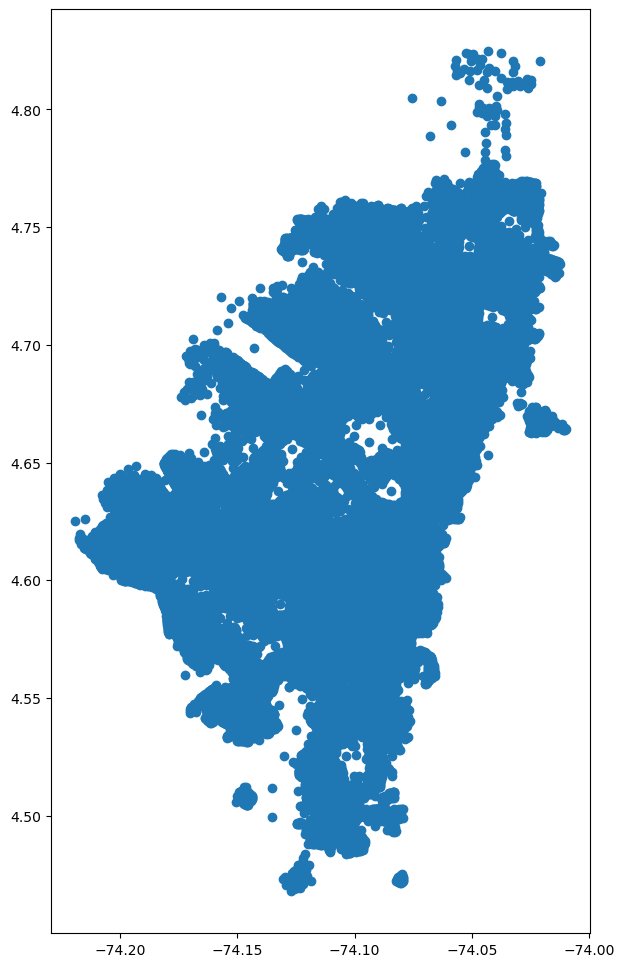

In [6]:
# Visualizing the centroids of each city
centroid_squares.plot(figsize = (15,12))

<Axes: >

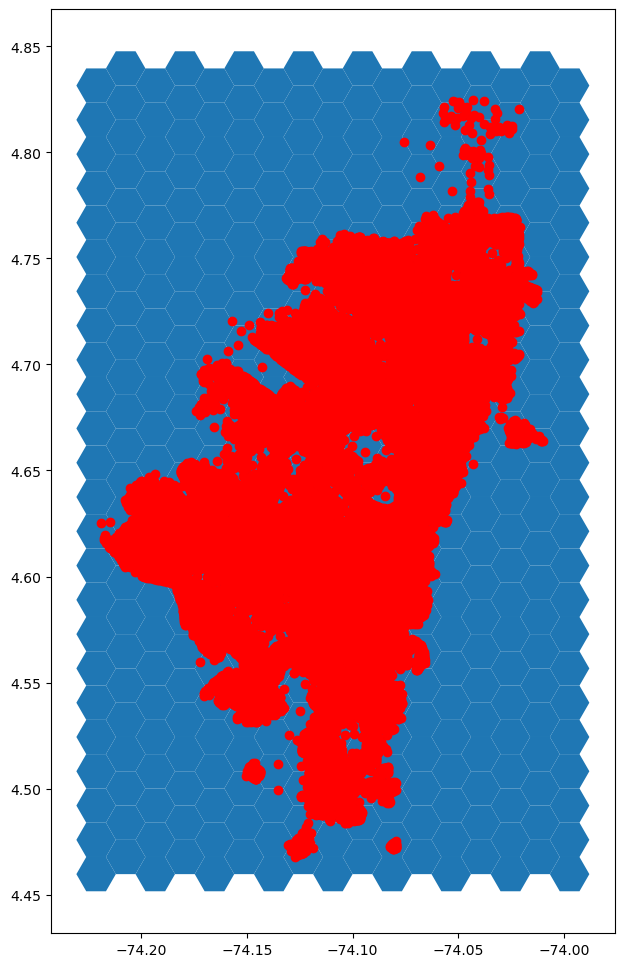

In [7]:
# Combinging the variables grilla and centroid_squares which correspon to population density
axis = grilla.plot(figsize = (15,12))
centroid_squares.plot(ax = axis, color = "red")

In [8]:
# Importing Spatial Joining
from geopandas.tools import sjoin

In [9]:
# Joining two dataframes in a new geo dataframe
join_df = sjoin(centroid_squares, grilla)
join_df.head()

,CODIGO_MAN,ESTRATO,CODIGO_ZON,CODIGO_CRI,NORMATIVA,FECHA_ACTO,NUMERO_ACT,SIMBOLO,ESCALA_CAP,FECHA_CAPT,...,DENSIDAD_P,Shape_Le_1,Shape_Area,geometry,index_right,left,bottom,right,top,ID
0,00921249,2,9,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,397.47,322.936246,2717.193691,POINT (-74.08152 4.74135),257,-74.090676,4.726412,-74.072009,4.742578,258.0
1,00921248,2,5,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,145.87,175.602169,1645.311119,POINT (-74.08134 4.74156),257,-74.090676,4.726412,-74.072009,4.742578,258.0
2,00840722,6,17,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,67.86,858.663208,39786.805154,POINT (-74.02511 4.69449),351,-74.034676,4.694081,-74.016009,4.710247,352.0
3,006404A1,0,19,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,0.00,327.778009,6065.962240,POINT (-74.12883 4.67724),181,-74.132676,4.669832,-74.114009,4.685998,182.0
4,00652201,0,10,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,0.00,1751.711946,60476.334401,POINT (-74.14251 4.66306),157,-74.146676,4.661749,-74.128009,4.677915,158.0


In [10]:
# Filtering from join_df only the population values that are bigger than 0 in "Density_p"
join_df = join_df.query("DENSIDAD_P > 0")
join_df.head()

,CODIGO_MAN,ESTRATO,CODIGO_ZON,CODIGO_CRI,NORMATIVA,FECHA_ACTO,NUMERO_ACT,SIMBOLO,ESCALA_CAP,FECHA_CAPT,...,DENSIDAD_P,Shape_Le_1,Shape_Area,geometry,index_right,left,bottom,right,top,ID
0,00921249,2,9,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,397.47,322.936246,2717.193691,POINT (-74.08152 4.74135),257,-74.090676,4.726412,-74.072009,4.742578,258.0
1,00921248,2,5,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,145.87,175.602169,1645.311119,POINT (-74.08134 4.74156),257,-74.090676,4.726412,-74.072009,4.742578,258.0
2,00840722,6,17,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,67.86,858.663208,39786.805154,POINT (-74.02511 4.69449),351,-74.034676,4.694081,-74.016009,4.710247,352.0
9,00913628,6,17,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,0.68,1383.849429,88882.665540,POINT (-74.05241 4.82407),311,-74.062676,4.823407,-74.044009,4.839573,312.0
12,00853902,0,20,544,DEC544,2009-12-17,544,None,5000,2009-12-17,...,0.35,6907.118136,540874.462524,POINT (-74.03488 4.80868),333,-74.048676,4.799159,-74.030009,4.815324,334.0


<a id="map_graph"> <a/>
# 2. Map density visualization

[Return to: Table of contents](#table_content)

In [11]:
# Grouping by grilla ID to identify the population density
pop_density = join_df.groupby("ID")["DENSIDAD_P"].agg(["sum"])
pop_density.sort_values(by=["sum"], ascending=[True], inplace=True) # Sorting 

Text(241.07244425882618, 0.5, 'Latitude')

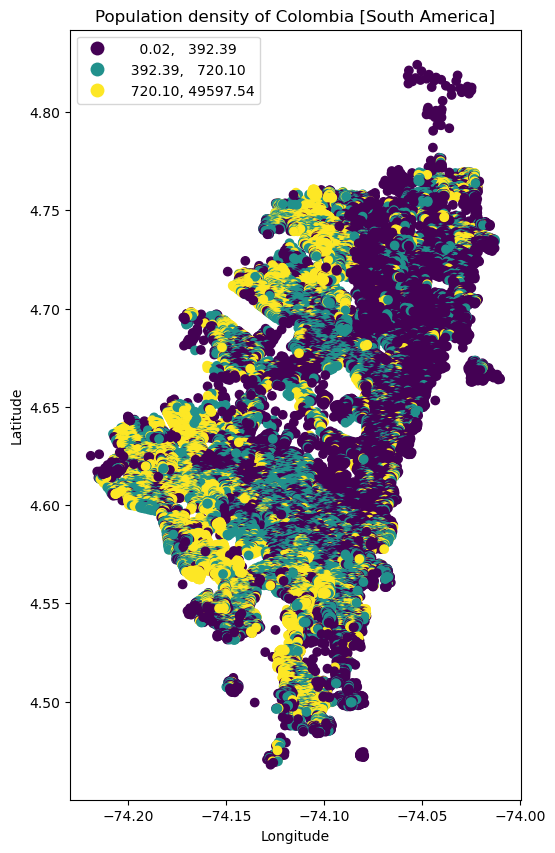

In [12]:
# Population density 
graph1 = join_df.plot(column = "DENSIDAD_P", scheme = "QUANTILES", k = 3, figsize = (10,10), legend = True)
graph1.set_title("Population density of Colombia [South America]")
graph1.set_xlabel("Longitude")
graph1.set_ylabel("Latitude")

<a id="conclusion"> <a/>
## 3. Insights:
The **legend** shows the population density ranges from a low of approximately 392 people per square kilometer to a high of over 45,000 people per square kilometer.

The population in Colombia is not evenly distributed. The highest population density is concentrated in the Western, Southeastern, and Northwestern parts of the country. In contrast, the Central, Northern, and Eastern regions have lower population densities, likely due to factors such as dense forests and challenging terrain. The remaining areas exhibit a medium population density.

It can be inferred that geographical features significantly influence population distribution in Colombia. Coastal areas and river valleys, which offer fertile land and transportation routes, tend to have higher population densities. Contrary, mountainous and forested regions, such as the Amazon rainforest and the Darien Gap, have lower population densities due to limited access and harsher environmental conditions.

[Return to: Table of contents](#table_content)